In [1]:
#help function
def set_spines():
    ax = plt.gca()  # gca stands for 'get current axis'
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd

 # Linear Regression
 <ul style="margin-left: 30px">
      <li>1  <a href='#simple~linear~regression'>Simple linear regression </a> </li> 
      <li>1.1 <a href='#fitting~reg'> Fitting the regresion line</a> </li>
      <li>1.2 <a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li>
      <li>1.3 <a href='#effect~learning~rate'>Effect of different values for learning rate</a> </li>
      <li>2 <a href='#m-linear-r'>Multiple linear regression</a> </li>
      <li><a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li>    
      <li><a href='#conclusion'>Conclusion</a> </li>
</ul>    

In statistic, LA is an linear approach to modeling the realationship between  one or more explanatory variables (independent or dependent).The case of one explanatory variable is  called  Simple Linear Regression for  more then one is called Multiple Linear Regression.In Linear Regression the relationships are modeled using <a href='https://en.wikipedia.org/wiki/Linear_predictor_function'> linear predictors function </a> whose unknown parameters are estimated from data.

<h2 id='simple~linear~regression'> Simple linear regression </h2>

Simple Linear regression has a single explanatory variable.It concerns two-dimensional sample points with one dependent and one independent variable. (Conventionally x and y data point in Cartesian coordinate system).The adjective simple refers to the fact that the outcome variable is related to a single predictor.

<h2 href='fitting~reg'> Fitting the regression line </h2>


Consider the model function $y = \alpha + \beta x$ which describes a line with slope $\beta$ and intercept $\alpha$. <br>
example : let $\alpha=7$ and $\beta=3$, geometrically $y = 7 + 3 x$ appears to be as below graphic.

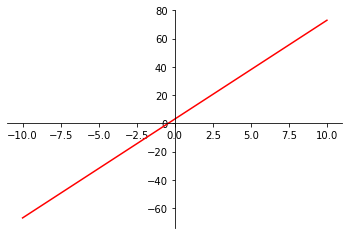

In [3]:
x = np.linspace(-10,10)
y = 7*x + 3
#plt.scatter(x,y)
plt.plot(x,y,color='r')
set_spines()


Suppose we observe $n$ data pairs denoted with $(x_i,y_i), i = 1,2,...,n$.

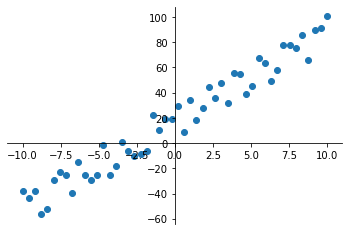

In [4]:
f = lambda x : 7*x + 3 + np.random.uniform(0,30)
y =[f(i) for i in x]
plt.scatter(x,y)
set_spines()

We can describe the underlying relationship between $y_i$ and $x_i$ invloving the error term $\varepsilon_i$ in linear equation $y_i =  \alpha + \beta x + \varepsilon_i $.The  $\varepsilon_i$  could be intepreted as the noise of the data or in some sense some type of randomness originated from various reasons.
Our target is to find estimated values $\alpha$ and $\beta$ which would provide the best fit in some sense for data points.
In order to find the 'best' fit we will use the <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.From  mathematical view point the issue involved the minimization of Lost function respect to $\alpha,\beta$. 
 $$1)  L = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$L$ is called $Lost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Lost$ function.This function is appropiative because of It is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}L(\alpha,\beta,x_i,_yi)$ we will use Gradient Descent method.<br>

<h2 id='grad~sim~linear'> Gradient Descent over simple linear regression</h2>

The methods for finding the maximum and minumum (extrema) have been created with developing of mathematical analysis(calculus).Gradient Descent is numerical approach to local minumum of first-oreder differentiable function.The idea is to take repeaded steps on the oposite direction of the gradient the function in current point. 


Our pupose is to find the value of $x$ where the function gets the minumum value.
The GD algorithm is difined by : 
  $$\alpha = \alpha - \nabla_{\alpha}L(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}L(\alpha,\beta)*h$$ <br>
  
where $h$ is called <mark>Learning rate</mark> or step size.
Applying GD algorithm over our lost function 1) we will get : <br> <br>
$$\nabla_{\alpha}(J(a,b)=\frac{\partial{L}}{\partial{{\alpha}}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\alpha}}}=-\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i} $$ <br>
$$\nabla_{\beta}(J(a,b)=\frac{\partial{L}}{\partial{{\beta }}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\beta}}}=- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} $$ <br> <br>
applying above to gradient descent forumula related to simple linear regression we achieved : 
 $$\alpha = \alpha + \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i}*h$$
  $$\beta = \beta +\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)}*h$$ <br>

In [5]:
#implementation cost function
def lost(X,Y,alpha,betta):
    '''
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    Returns :
      number of cost function
  '''
   
    return np.sum((Y - (alpha - betta*X ))**2 )


In [6]:
def gradient_descent(X,Y,C=0.1,E=100):
    '''
    
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a = 30
    b = 10 
    a_args = []
    b_args = []
    n = X.size
  
    for i in range(E):
        a = a + 2/n*(np.sum((Y - a*X - b)*X))*C
        b =  b + 2/n*(np.sum((Y - a*X -b)))*C
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

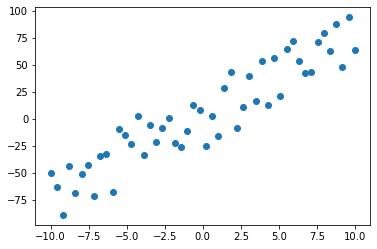

In [7]:
x = np.linspace(-10,10)
f = lambda x : 7*x + 3 + np.random.uniform(-30,30)
y =[f(i) for i in x]
plt.scatter(x,y)

Let to apply gradient descent of above points.

In [8]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.01,E=1000)

(7.252144938413704, 4.9181999848731435)

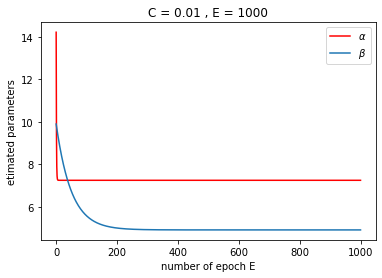

In [9]:
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.01 , E = 1000')
plt.legend()
a,b


From graphics we can see that the curves tend to  result $(\alpha = 6.6603, \beta =4.431)$.
<br> 
The fit line will be : 

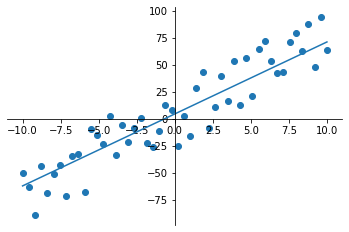

In [10]:
#7.047696929660597, 1.081292922517757
plt.scatter(x,y)  #7.892385161777225, 5.6459662769234535
plt.plot(x,6.6603*x +  4.431)
set_spines()

It seems to be somehow approriative line wich discribe the data well, but our origin values of $$ are $(\alpha = 7, \beta = 1)$   not $(\alpha = 6.6603, \beta = 4.431)$.In below we will examine how will chaged the $(\alpha,\beta)$ resprect to different Learnig rate $C$ and nuber of epoch E(itarations).

 <h2 href='effect~learning~rate'>1.3  Effect of different values for learning rate </h2>

The Learning rate C is the tunning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of cost function.While the gradient direction is usually determined from the gradient of the cost function, the learning rate determines how big a step is taken in that direction.The too hight learning rate will make  the learning jump  over minima but too low leaning rate will either take too long to converge or get stuck in an undesirable local minimum.In order to achieve faster convergence, prevent oscillations and getting stuck in undesirable local minima the learning rate is often varied during training either in accordance to a learning rate schedule or by using an adaptive learning rate

let's apply different learnning rate to our example:
$C = 0.000001$

(7.274192673568719, 9.078825104573044)

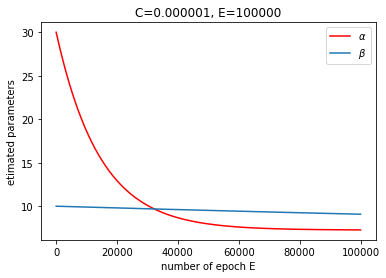

In [11]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.000001,E=100000)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C=0.000001, E=100000')
plt.legend()
a,b

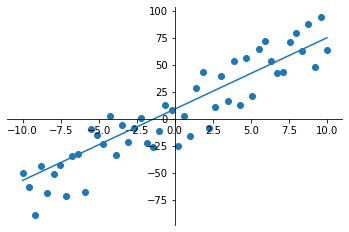

In [12]:
plt.scatter(x,y) 
plt.plot(x,6.6*x + 8.9)
set_spines()

When the data is too big, The decreasing of learning rate can lead to enormous time execution,but in above the result is satisfying too.

(7.157728698080163e+184, -5.2910862752500874e+169)

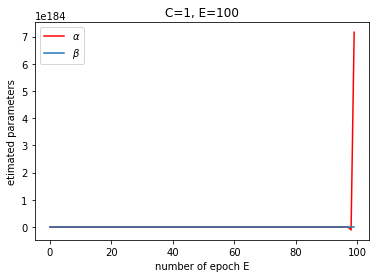

In [13]:
a,b,a_r,b_r = gradient_descent(x,y,C=1,E=100)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C=1, E=100')
plt.legend()
a,b

The result is extremely bad. In this case, the learning has made a learning jump, therefore the result is run away from minima.